<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest (or Bootstrap Aggregation)

In [1]:
import seaborn as sns                                       #for visualization
import sklearn.metrics as sm                                 #matrics
import pandas as pd                                         #dataset/data handling
import numpy as np                                          #dataset/data handling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split        #train and test divide
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt                             #for visualization
from joblib import Parallel, delayed                        #saving and loading the model
import joblib


def save_model(model,model_name):
 joblib.dump(model, model_name+".sav")

def load_model(model_name):
  return joblib.load(model_name)


def prim_plot(y_actual,y_pred):
  pred_y_df=pd.DataFrame(
      {
          "Actual_Value":y_actual,
          "Predicted_Value":y_pred,
          "Difference":y_actual-y_pred
      }
  )

  sns.regplot(x="Actual_Value", y="Predicted_Value", data=pred_y_df)


def res(y_actual,y_pred):
  print("Mean absolute error =", sm.mean_absolute_error(y_actual, y_pred))
  print("Mean squared error =", sm.mean_squared_error(y_actual, y_pred))
  print("Root mean squared error =", sqrt(sm.mean_squared_error(y_actual, y_pred)))
  print("Median absolute error =", sm.median_absolute_error(y_actual, y_pred))
  print("Explain variance score =", sm.explained_variance_score(y_actual, y_pred))
  print("R2 score =", sm.r2_score(y_actual, y_pred))


In [2]:
dataset = pd.read_excel("/content/dataset 11.xlsx")

In [3]:
dataset

,Type,M/C Dia (Output),M/C gauge (Output),Yarn Count,Stich Length,Finish Dia,Finish GSM,Color Range,Shrinkage Length,Shrinkage Width,Twist
0,TERRY,32,24,24.0,2.90,70,240,Light,-2.0,-5.0,2.4
1,TERRY,30,24,24.0,2.90,66,240,Light,-3.0,-4.3,0.5
2,TERRY,32,24,24.0,2.90,70,240,Light,-6.1,-3.0,0.5
3,TERRY,30,24,24.0,2.90,66,240,Light,-5.6,-4.3,2.3
4,FLEECE,26,24,30.0,3.05,60,260,Light,-3.7,-5.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...
83,"RIB (2x2, 1x1, 2x1)",40,18,28.0,2.62,76,225,Average,-4.1,-8.0,5.0
84,"RIB (2x2, 1x1, 2x1)",40,18,28.0,2.62,76,225,Black,-1.3,-11.0,5.0
85,"RIB (2x2, 1x1, 2x1)",42,18,34.0,2.90,50,240,Wash,-3.0,-5.0,4.5
86,"RIB (2x2, 1x1, 2x1)",42,18,34.0,2.90,50,240,Wash,-3.5,-4.0,2.0


In [4]:
dataset.shape

(88, 11)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Type                88 non-null     object 
 1   M/C Dia (Output)    88 non-null     int64  
 2   M/C gauge (Output)  88 non-null     int64  
 3   Yarn Count          88 non-null     float64
 4   Stich Length        88 non-null     float64
 5   Finish Dia          88 non-null     int64  
 6   Finish GSM          88 non-null     int64  
 7   Color Range         88 non-null     object 
 8   Shrinkage Length    88 non-null     float64
 9   Shrinkage Width     88 non-null     float64
 10  Twist               88 non-null     float64
dtypes: float64(5), int64(4), object(2)
memory usage: 7.7+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset["Type"]=encoder.fit_transform(dataset["Type"])
dataset["Color Range"]=encoder.fit_transform(dataset["Color Range"])

In [8]:
dataset

,Type,M/C Dia (Output),M/C gauge (Output),Yarn Count,Stich Length,Finish Dia,Finish GSM,Color Range,Shrinkage Length,Shrinkage Width,Twist
0,12,32,24,24.0,2.90,70,240,3,-2.0,-5.0,2.4
1,12,30,24,24.0,2.90,66,240,3,-3.0,-4.3,0.5
2,12,32,24,24.0,2.90,70,240,3,-6.1,-3.0,0.5
3,12,30,24,24.0,2.90,66,240,3,-5.6,-4.3,2.3
4,1,26,24,30.0,3.05,60,260,3,-3.7,-5.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...
83,5,40,18,28.0,2.62,76,225,0,-4.1,-8.0,5.0
84,5,40,18,28.0,2.62,76,225,1,-1.3,-11.0,5.0
85,5,42,18,34.0,2.90,50,240,6,-3.0,-5.0,4.5
86,5,42,18,34.0,2.90,50,240,6,-3.5,-4.0,2.0


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Type                88 non-null     int64  
 1   M/C Dia (Output)    88 non-null     int64  
 2   M/C gauge (Output)  88 non-null     int64  
 3   Yarn Count          88 non-null     float64
 4   Stich Length        88 non-null     float64
 5   Finish Dia          88 non-null     int64  
 6   Finish GSM          88 non-null     int64  
 7   Color Range         88 non-null     int64  
 8   Shrinkage Length    88 non-null     float64
 9   Shrinkage Width     88 non-null     float64
 10  Twist               88 non-null     float64
dtypes: float64(5), int64(6)
memory usage: 7.7 KB


#Regression Model for `M/C Dia (Output)`

In [10]:
list(dataset.columns)

['Type',
 'M/C Dia (Output)',
 'M/C gauge (Output)',
 'Yarn Count',
 'Stich Length',
 'Finish Dia',
 'Finish GSM',
 'Color Range',
 'Shrinkage Length',
 'Shrinkage Width',
 'Twist']

In [12]:
feature_columns = ['Type',
 'Yarn Count',
 'Stich Length',
 'Finish Dia',
 'Finish GSM',
 'Color Range',
 'Shrinkage Length',
 'Shrinkage Width',
 'Twist']

X = dataset.loc[:,feature_columns]
y = dataset['M/C Dia (Output)']

In [13]:
X

,Type,Yarn Count,Stich Length,Finish Dia,Finish GSM,Color Range,Shrinkage Length,Shrinkage Width,Twist
0,12,24.0,2.90,70,240,3,-2.0,-5.0,2.4
1,12,24.0,2.90,66,240,3,-3.0,-4.3,0.5
2,12,24.0,2.90,70,240,3,-6.1,-3.0,0.5
3,12,24.0,2.90,66,240,3,-5.6,-4.3,2.3
4,1,30.0,3.05,60,260,3,-3.7,-5.0,0.5
...,...,...,...,...,...,...,...,...,...
83,5,28.0,2.62,76,225,0,-4.1,-8.0,5.0
84,5,28.0,2.62,76,225,1,-1.3,-11.0,5.0
85,5,34.0,2.90,50,240,6,-3.0,-5.0,4.5
86,5,34.0,2.90,50,240,6,-3.5,-4.0,2.0


In [14]:
y

0     32
1     30
2     32
3     30
4     26
      ..
83    40
84    40
85    42
86    42
87    34
Name: M/C Dia (Output), Length: 88, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=11)

In [16]:
#RF model
model_rf_dia = RandomForestRegressor(n_estimators=35,random_state=0)

model_rf_dia.fit(X_train, y_train)

pred_test = model_rf_dia.predict(X_test)
res(y_test,pred_test)

Mean absolute error = 0.9555555555555552
Mean squared error = 3.2005442176870735
Root mean squared error = 1.789006489000829
Median absolute error = 0.3999999999999986
Explain variance score = 0.8749880040555328
R2 score = 0.8724820060832991


In [17]:
save_model(model_rf_dia,"M-C_Dia")

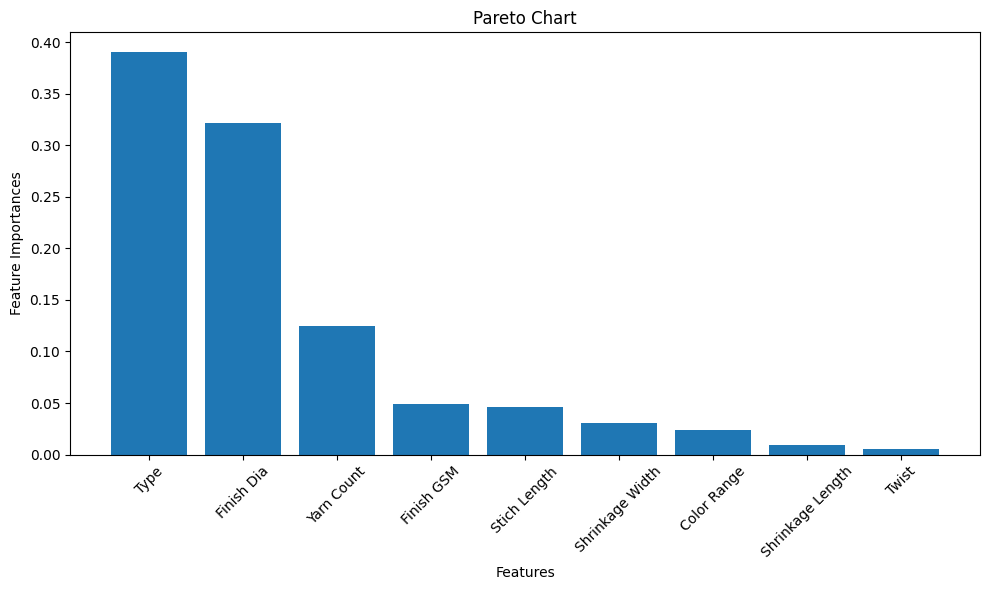

In [18]:

feature_importances = model_rf_dia.feature_importances_
feature_names = list(X.columns)
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=45)
plt.xlabel("Features")
plt.ylabel("Feature Importances")
plt.title("Pareto Chart")

plt.tight_layout()
plt.show()

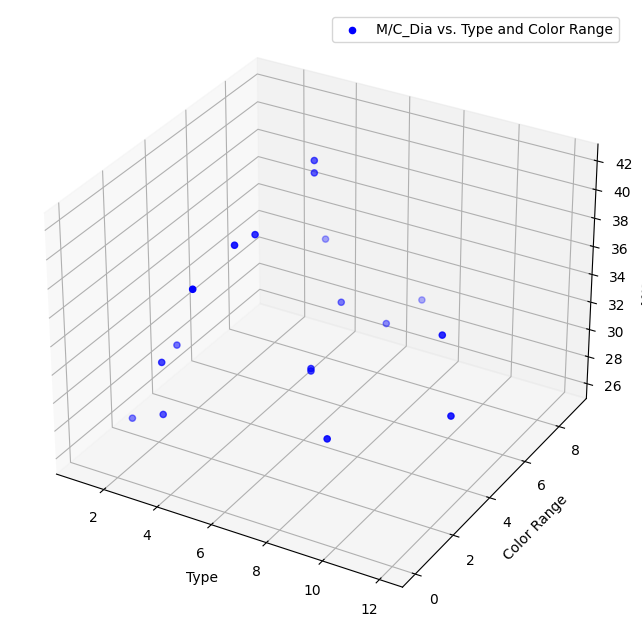

In [20]:
column_1 = 'Type'
column_2 = 'Color Range'

Y = pred_test
X1 = X_test.loc[:,column_1]
X2 = X_test.loc[:,column_2]


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X1, X2, Y, c='b', marker='o', label="M/C_Dia"+' vs. '+column_1+' and '+column_2)

# Set labels for the axes
ax.set_xlabel(column_1)
ax.set_ylabel(column_2)
ax.set_zlabel("M/C_gauge")

# Set the title
#ax.set_title('3D Scatterplot of Y vs. X1 and X2')

# Add a legend
ax.legend()

plt.show()

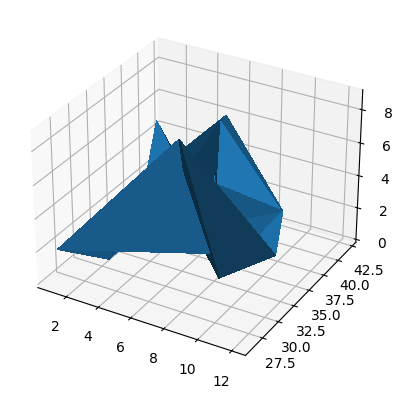

In [21]:

Y = pred_test
X = X_test.loc[:,column_1]
Z = X_test.loc[:,column_2]
X = np.asarray(X)
Y = np.asarray(Y)
Z = np.asarray(Z)
fig = plt.figure()
ax = fax = fig.add_subplot(projection='3d')
surf = ax.plot_trisurf(X, Y, Z, linewidth=0, antialiased=False)
plt . show ( )

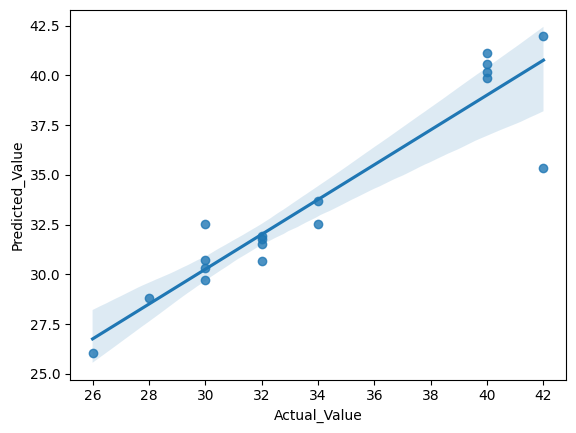

In [22]:
prim_plot(y_test,pred_test)

#Regression Model for `M/C gauge (Output)`

In [23]:
feature_columns = [
'Type',
 'Yarn Count',
 'Stich Length',
 'Finish Dia',
 'Finish GSM',
 'Color Range',
 'Shrinkage Length',
 'Shrinkage Width',
 'Twist']

X = dataset.loc[:,feature_columns]
y = dataset['M/C gauge (Output)']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=41)

In [25]:
#RF model
model_rf_gauge = RandomForestRegressor(n_estimators=35,random_state=0)
model_rf_gauge.fit(X_train, y_train)

pred_test = model_rf_gauge.predict(X_test)
res(y_test,pred_test)

Mean absolute error = 0.4730158730158729
Mean squared error = 1.177142857142857
Root mean squared error = 1.08496214548843
Median absolute error = 0.0
Explain variance score = 0.8700759637188209
R2 score = 0.8675714285714285


In [26]:
save_model(model_rf_gauge,"M-C_gauge")

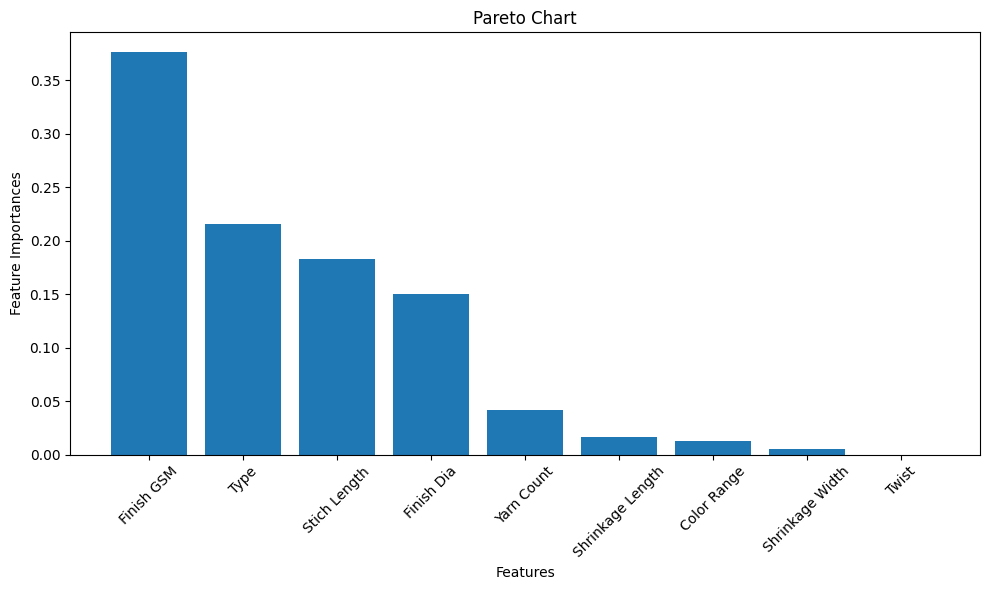

In [27]:

feature_importances = model_rf_gauge.feature_importances_
feature_names = list(X.columns)
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=45)
plt.xlabel("Features")
plt.ylabel("Feature Importances")
plt.title("Pareto Chart")

plt.tight_layout()
plt.show()

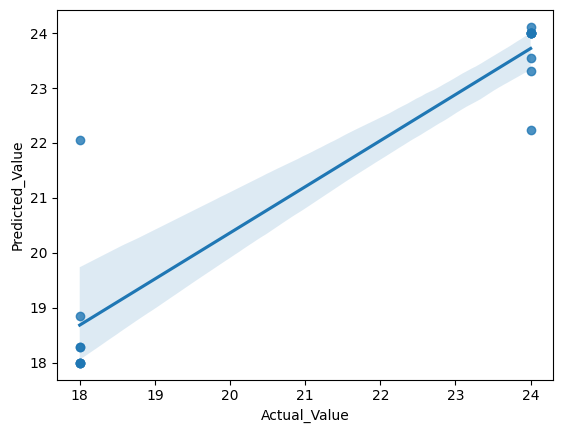

In [28]:
prim_plot(y_test,pred_test)

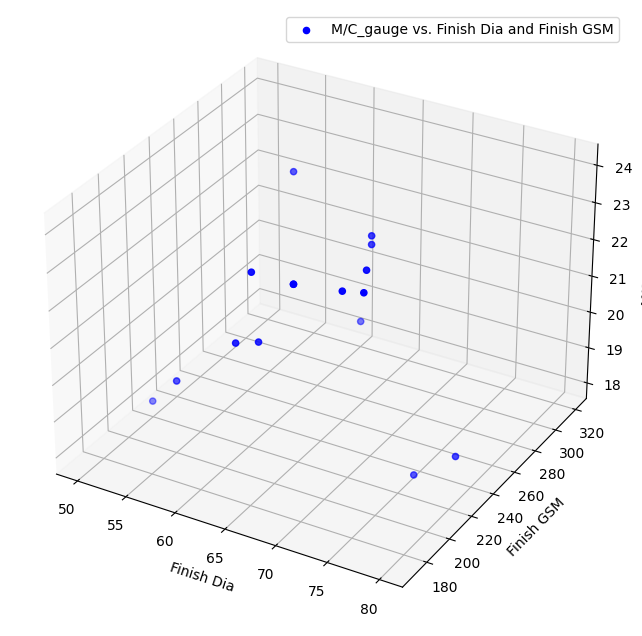

In [29]:
column_1 = 'Finish Dia'
column_2 ='Finish GSM'

Y = pred_test
X1 = X_test.loc[:,column_1]
X2 = X_test.loc[:,column_2]


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X1, X2, Y, c='b', marker='o', label="M/C_gauge"+' vs. '+column_1+' and '+column_2)

# Set labels for the axes
ax.set_xlabel(column_1)
ax.set_ylabel(column_2)
ax.set_zlabel("M/C_gauge")

# Set the title
#ax.set_title('3D Scatterplot of Y vs. X1 and X2')

# Add a legend
ax.legend()

plt.show()

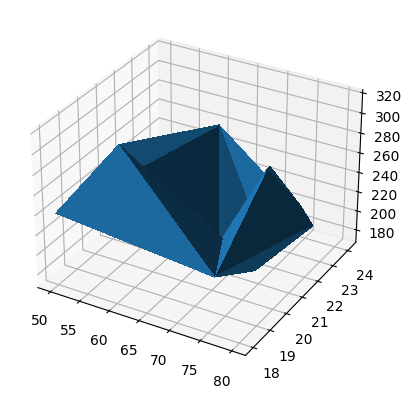

In [30]:
Y = pred_test
X = X_test.loc[:,column_1]
Z = X_test.loc[:,column_2]
X = np.asarray(X)
Y = np.asarray(Y)
Z = np.asarray(Z)
fig = plt.figure()
ax = fax = fig.add_subplot(projection='3d')
surf = ax.plot_trisurf(X, Y, Z, linewidth=0, antialiased=False)
plt . show ( )

#Model Load And Validation

In [32]:
val_df = pd.read_excel("/content/validation data.xlsx")

In [33]:
val_df

,Type,M/C Dia (Output),M/C gauge (Output),Yarn Count,Stich Length,Finish Dia,Finish GSM,Color Range,Shrinkage Length,Shrinkage Width,Twist
0,TERRY,30,20,32,4.50,72,280,White,3.5,-6.0,0.5
1,TERRY,32,24,24,2.90,70,240,Light,0.5,-7.3,1.0
2,TERRY,30,24,24,2.90,66,240,Light,0.5,-4.0,0.5
3,TERRY,32,24,24,2.90,70,240,Light,0.5,-5.0,0.5
4,TERRY,30,20,32,4.60,72,280,Light,0.5,-4.5,0.5
5,TERRY,30,20,32,4.62,72,280,Light,1.0,-4.0,1.0
6,S//J 140 GSM,30,24,30,3.15,66,175,White,3.2,-8.0,0.5
7,S//J 180 GSM,40,24,30,2.95,72,155,Melange,0.5,-3.0,0.5
8,S//J 180 GSM,36,24,32,2.85,60,195,Light,1.5,-2.0,0.5
9,S//J 180 GSM,32,24,30,3.15,56,191,Dark,0.5,0.5,0.5


In [40]:
encoder=LabelEncoder()
val_df["Type"]=encoder.fit_transform(val_df["Type"])
val_df["Color Range"]=encoder.fit_transform(val_df["Color Range"])

In [41]:
val_df

,Type,M/C Dia (Output),M/C gauge (Output),Yarn Count,Stich Length,Finish Dia,Finish GSM,Color Range,Shrinkage Length,Shrinkage Width,Twist
0,6,30,20,32,4.50,72,280,7,3.5,-6.0,0.5
1,6,32,24,24,2.90,70,240,3,0.5,-7.3,1.0
2,6,30,24,24,2.90,66,240,3,0.5,-4.0,0.5
3,6,32,24,24,2.90,70,240,3,0.5,-5.0,0.5
4,6,30,20,32,4.60,72,280,3,0.5,-4.5,0.5
5,6,30,20,32,4.62,72,280,3,1.0,-4.0,1.0
6,3,30,24,30,3.15,66,175,7,3.2,-8.0,0.5
7,5,40,24,30,2.95,72,155,5,0.5,-3.0,0.5
8,5,36,24,32,2.85,60,195,3,1.5,-2.0,0.5
9,5,32,24,30,3.15,56,191,2,0.5,0.5,0.5


In [42]:
feature_columns = [
'Type',
 'Yarn Count',
 'Stich Length',
 'Finish Dia',
 'Finish GSM',
 'Color Range',
 'Shrinkage Length',
 'Shrinkage Width',
 'Twist']

X = val_df.loc[:,feature_columns]
y = val_df['M/C gauge (Output)']

In [ ]:
M_C_gauge = load_model("/content/M-C_gauge.sav")

dic={}

for i in feature_columns:
  val_list = float(input(i+" :"))
  dic[i]=[val_list]

val_data = pd.DataFrame.from_dict(dic)

print("The Predicted Value:", M_C_gauge.predict(val_data))

In [ ]:
M_C_dia = load_model("/content/M-C_Dia.sav")

dic={}

for i in feature_columns:
  val_list = float(input(i+" :"))
  dic[i]=[val_list]

val_data = pd.DataFrame.from_dict(dic)

print("The Predicted Value:", M_C_dia.predict(val_data))